The aim of this project to predict the salary of individuals from varied countries and races based on their demographics such as occupation, age, gender, experience, education, etc. The dataset is taken from Kaggle. The dataset has 32561 rows and 15 columns. The dataset has 8 independent variables and 1 target variable i.e Salary

In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#loading the data
df = pd.read_csv(r"C:\Users\sonia\Downloads\Salary_Data_Based_country_and_race.csv")
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


# Data Preprocessing

In [7]:
#checking the shape of the data
df.shape

(6704, 9)

In [9]:
#checking for null/missing values
df.isnull().sum()


Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

In [11]:

df.dropna(axis=0, inplace=True)

In [13]:
#checking for null values
df.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

In [15]:
#dropping column
df.drop(columns = 'Unnamed: 0',axis=1,inplace=True)

In [17]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
dtype: object

In [19]:
#unique values in each column
df.nunique()

Age                     41
Gender                   3
Education Level          7
Job Title              191
Years of Experience     37
Salary                 444
Country                  5
Race                    10
dtype: int64

# Grouping Job Titles

In [22]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [24]:

df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)


# Grouping Education Level

In [27]:
def group_education(Educaton):
    
    Educaton = str(Educaton).lower()
    if 'high school' in Educaton:
        return 'High School'
    elif 'bachelor\'s' in Educaton:
        return 'Bachelors'
    elif 'master\'s' in Educaton:
        return 'Masters'
    elif 'phd' in Educaton:
        return 'PhD'

df['Education Level'] = df['Education Level'].apply(group_education)   

# Descriptive Statistics

In [30]:
#descriptive statistics
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [32]:

df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelors,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Masters,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelors,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Masters,Director,20.0,200000.0,USA,Asian


# Exploratory Data Analysis
In the exploratory data analysis, I will be looking at the data and try to understand the data. I will begin by looking at the distribution of data across the datset, followed by visualizing the data to understand the relationship between the features and the target variable.

# Pie chart for Gender

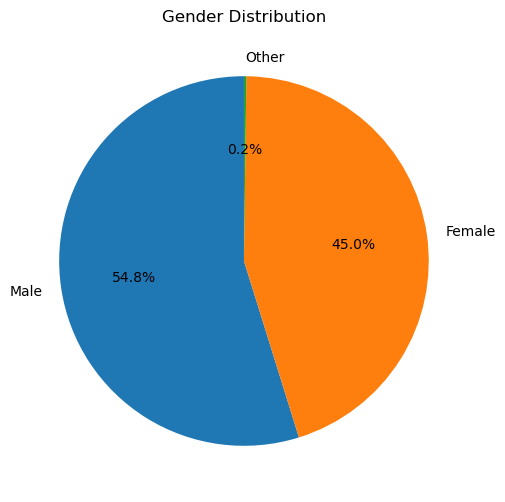

In [36]:

#pie chart
plt.figure(figsize=(10,6))
plt.pie(df['Gender'].value_counts(), labels=['Male','Female', 'Other'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

# Age Distribution

C:\Users\sonia\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


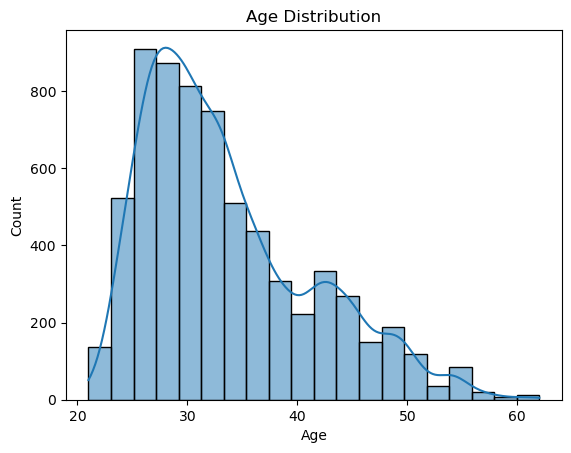

In [39]:
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# Education Level

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Bachelors'),
  Text(1, 0, 'Masters'),
  Text(2, 0, 'PhD'),
  Text(3, 0, 'High School')])

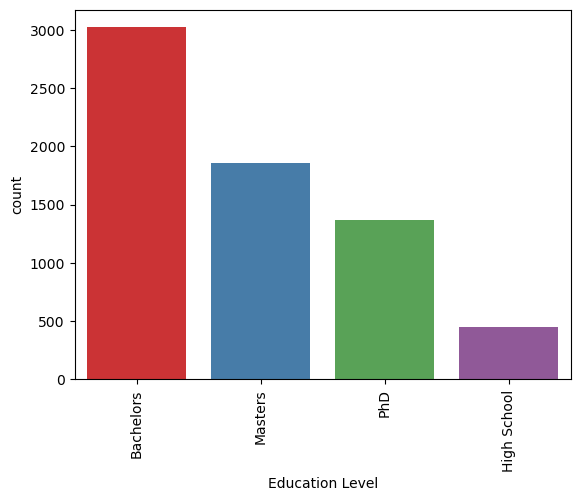

In [42]:
sns.countplot(x = 'Education Level', data = df, palette='Set1')
plt.xticks(rotation=90)

# Job Title

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

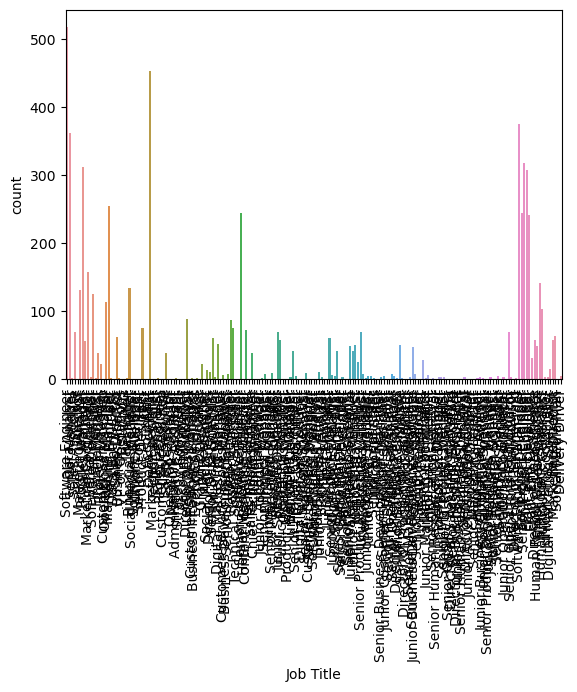

In [45]:
sns.countplot(x='Job Title', data = df)
plt.xticks(rotation=90)

# Years of Experience

C:\Users\sonia\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Years of Experience', ylabel='Count'>

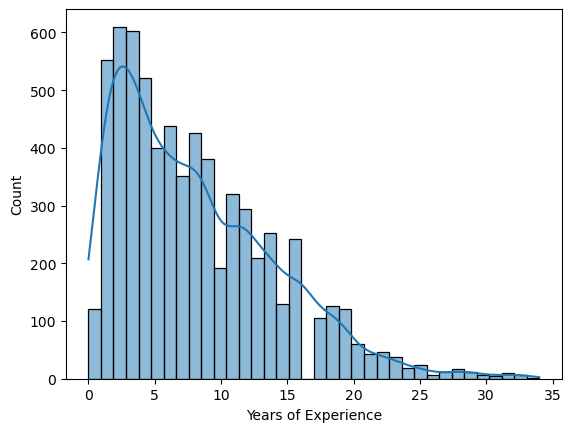

In [48]:
sns.histplot(x = 'Years of Experience', data = df,kde=True)

# Country

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'UK'),
  Text(1, 0, 'USA'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'China'),
  Text(4, 0, 'Australia')])

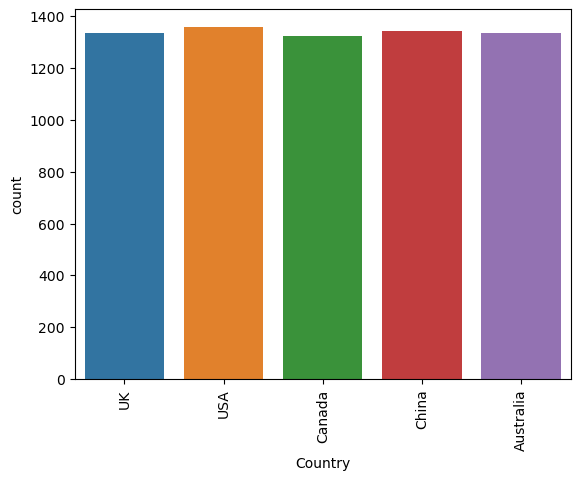

In [51]:
sns.countplot(x='Country', data=df)
plt.xticks(rotation=90)

# Racial Distribution

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Hispanic'),
  Text(2, 0, 'Asian'),
  Text(3, 0, 'Korean'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Australian'),
  Text(6, 0, 'Welsh'),
  Text(7, 0, 'African American'),
  Text(8, 0, 'Mixed'),
  Text(9, 0, 'Black')])

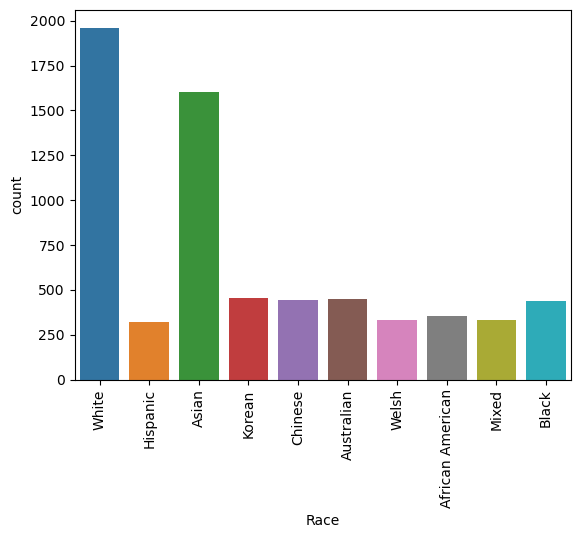

In [54]:
sns.countplot(x='Race', data=df)
plt.xticks(rotation=90)

# Age and Salary

Text(0.5, 1.0, 'Age vs Salary')

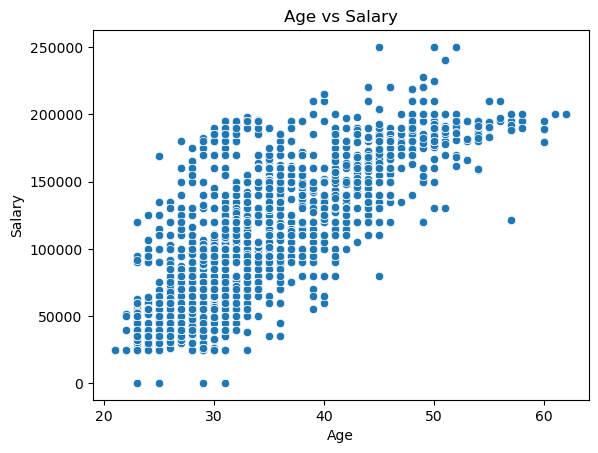

In [57]:
sns.scatterplot(x = 'Age', y='Salary', data=df)
plt.title('Age vs Salary')

# Gender and Salary

Text(0.5, 1.0, 'Gender vs Salary')

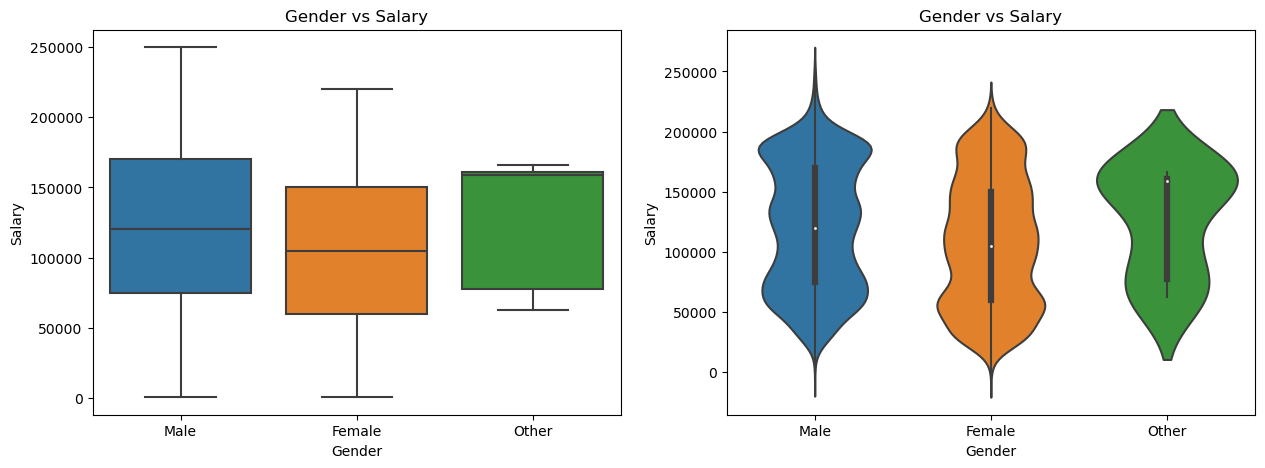

In [60]:
fig, ax = plt.subplots(1,2, figsize = (15, 5))
sns.boxplot(x = 'Gender', y='Salary', data = df, ax =ax[0]).set_title('Gender vs Salary')
sns.violinplot(x = 'Gender', y='Salary', data = df, ax =ax[1]).set_title('Gender vs Salary')



# Education Level and Salary

Text(0.5, 1.0, 'Education Level vs Salary')

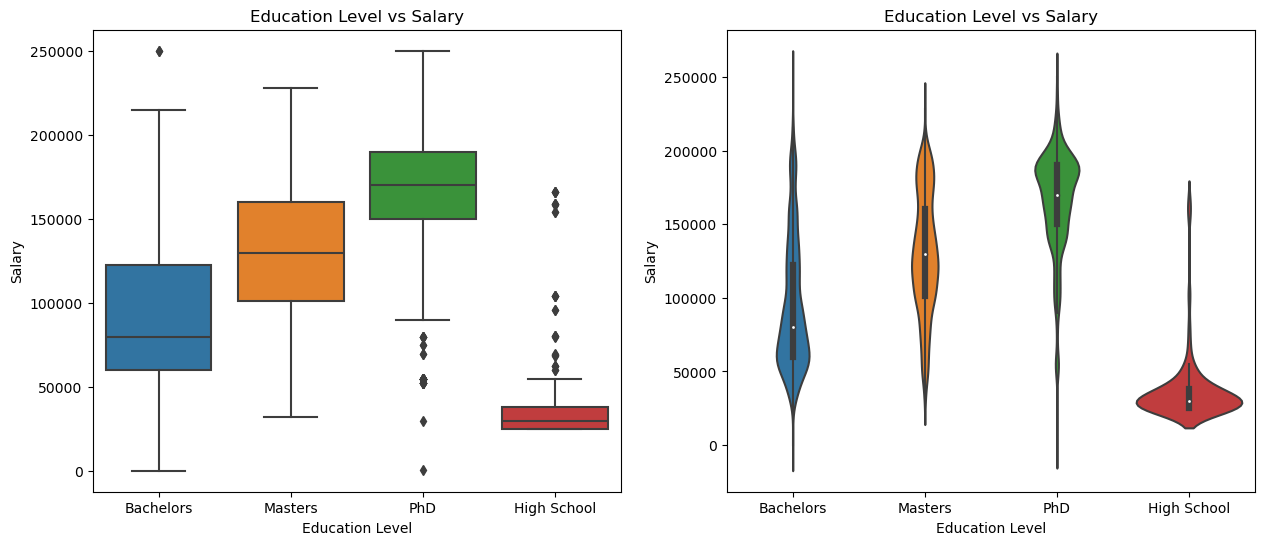

In [63]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Education Level', y = 'Salary', data = df, ax=ax[0]).set_title('Education Level vs Salary')
sns.violinplot(x = 'Education Level', y = 'Salary', data = df, ax=ax[1]).set_title('Education Level vs Salary')


# job Title and Salary

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

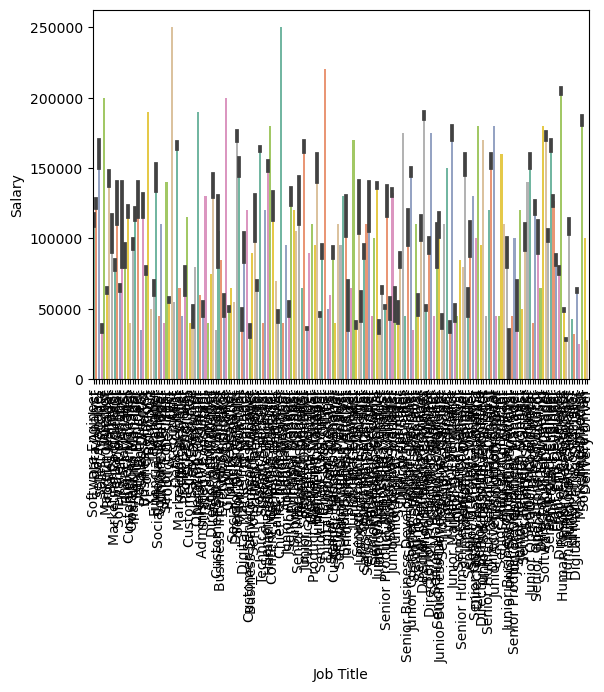

In [66]:
sns.barplot(x = 'Job Title', y = 'Salary', data = df, palette = 'Set2')
plt.xticks(rotation = 90)

# Experience and Salary

Text(0.5, 1.0, 'Years of Experience vs Salary')

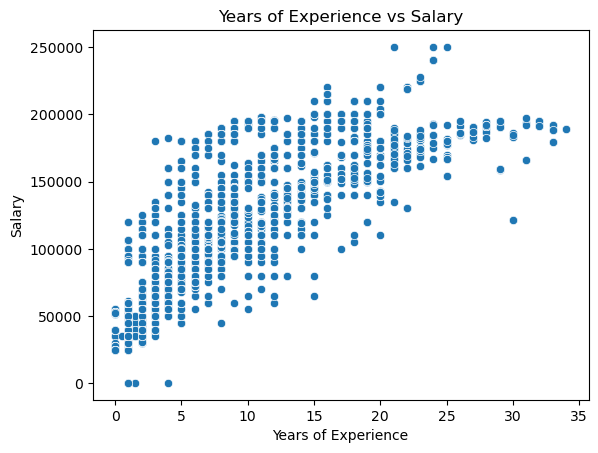

In [69]:
sns.scatterplot(x= 'Years of Experience', y  = 'Salary', data = df).set_title('Years of Experience vs Salary')

#### Country and Salary

<Axes: xlabel='Country', ylabel='Salary'>

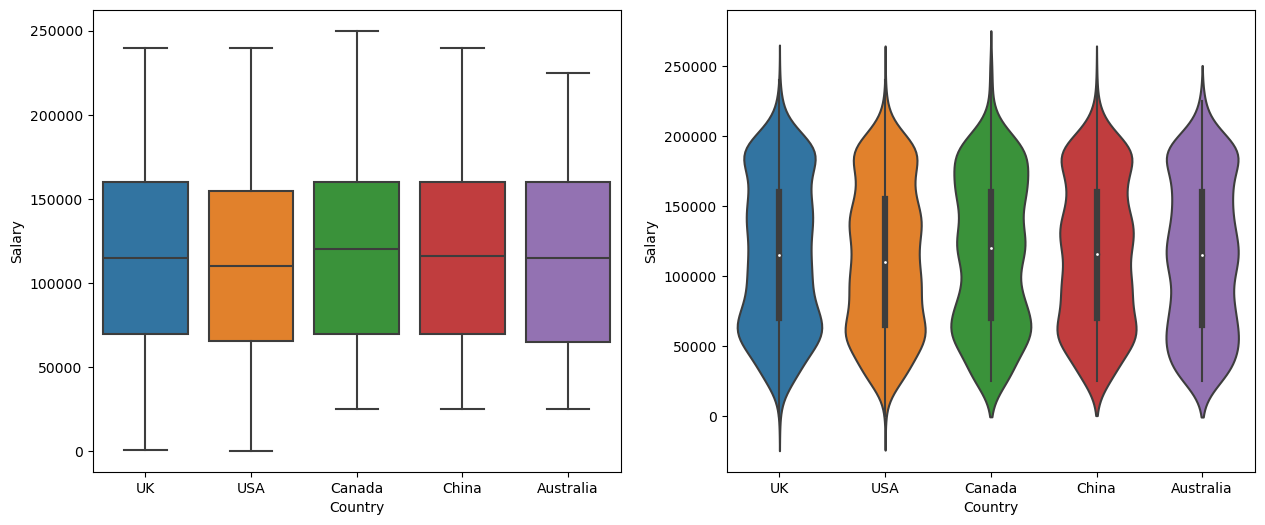

In [72]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Country', y = 'Salary', data = df, ax=ax[0])
sns.violinplot(x = 'Country', y = 'Salary', data = df, ax=ax[1])

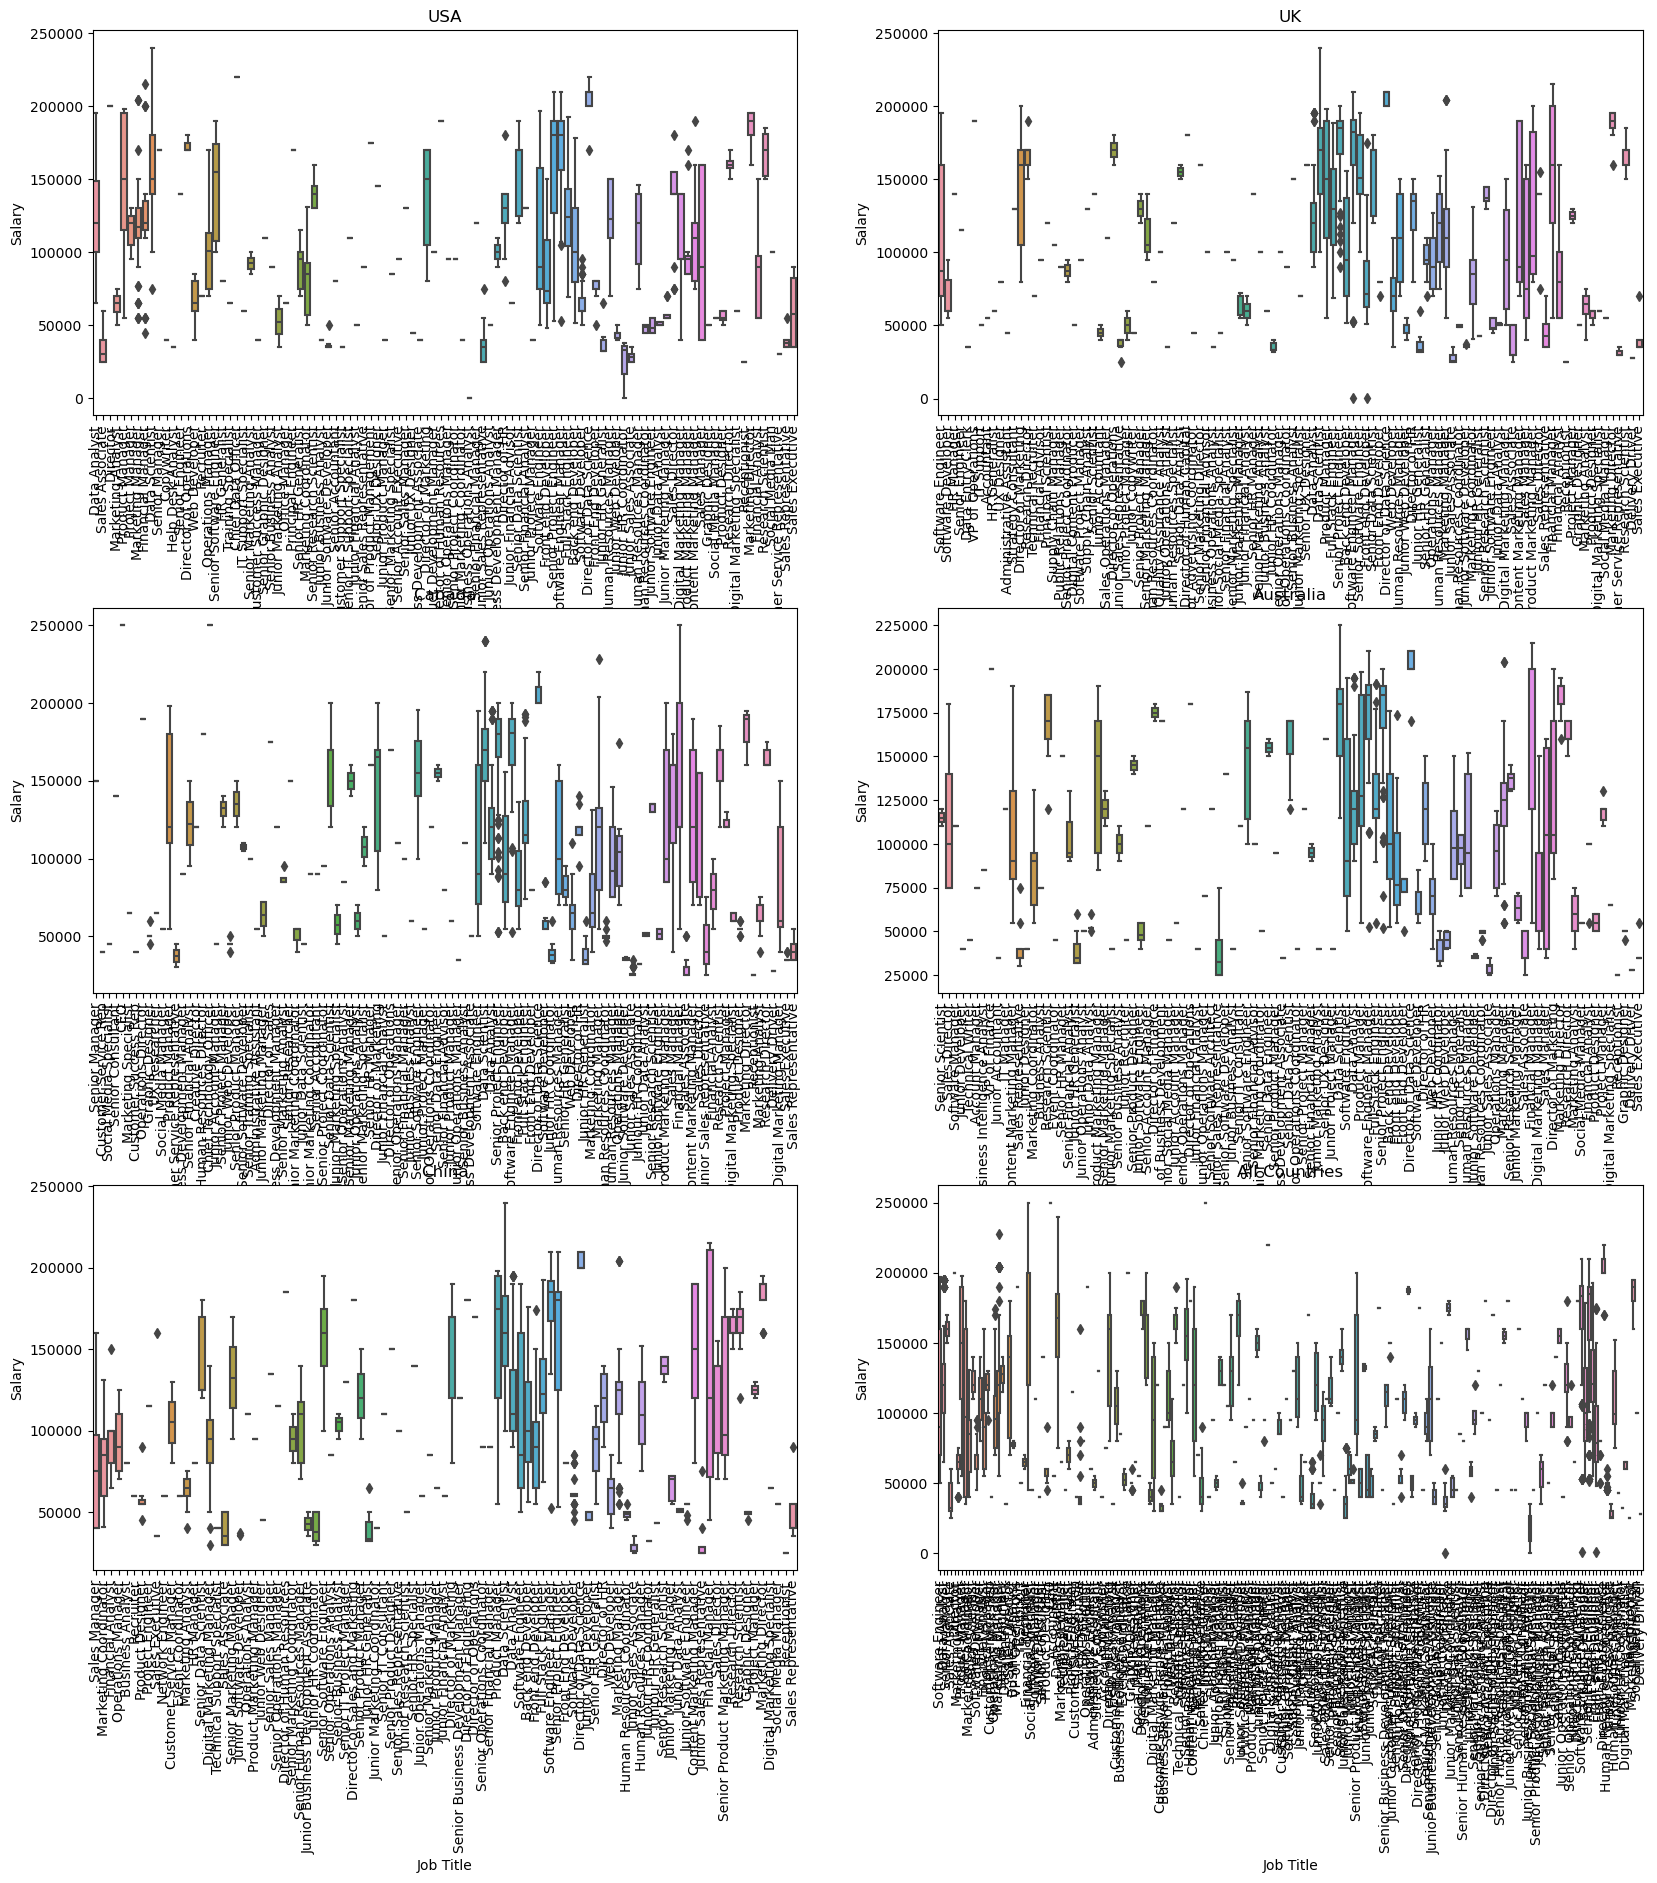

In [74]:
fig,ax = plt.subplots(3,2,figsize=(20,20))
plt.subplots_adjust(hspace=0.5)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'USA'], ax = ax[0,0]).set_title('USA')
ax[0,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'UK'], ax = ax[0,1]).set_title('UK')
ax[0,1].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'Canada'], ax = ax[1,0]).set_title('Canada')
ax[1,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'Australia'], ax = ax[1,1]).set_title('Australia')
ax[1,1].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'China'], ax = ax[2,0]).set_title('China')
ax[2,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df, ax = ax[2,1]).set_title('All Countries')
ax[2,1].tick_params(axis='x', rotation=90)

# Race and Salary

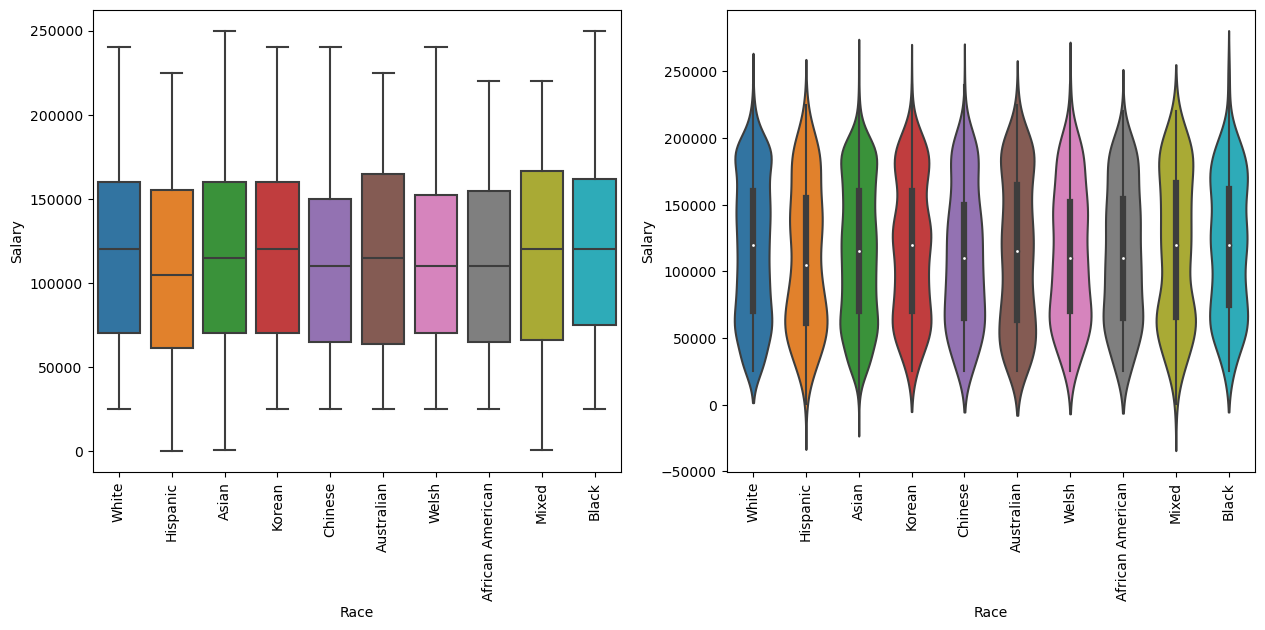

In [77]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Race', y = 'Salary', data = df, ax = ax[0])
ax[0].tick_params(axis='x', rotation=90)
sns.violinplot(x = 'Race', y ='Salary', data = df, ax = ax[1])
ax[1].tick_params(axis='x', rotation=90)


# Data Preprocessing 2

# Label encoding to categorical features

In [81]:

from sklearn.preprocessing import LabelEncoder
features = ['Gender','Country','Education Level','Job Title', 'Race']
le = LabelEncoder()
for feature in features:
    le.fit(df[feature].unique())
    df[feature] = le.transform(df[feature])
    print(feature, df[feature].unique())

Gender [1 0 2]
Country [3 4 1 2 0]
Education Level [0 2 3 1]
Job Title [175  18 144 115  25  93 106 118  94 165 174  47  40 109  14 102  96 130
  19 116   4 189  53 112  41 173 177  66 126 105   7   1  20  97 184  46
 108  17 117 186 101  98   2 179  11   0  33  48  13   6  38 188  45 187
 172  34 129  56  23  52  15   5 132 190 113 183  12 168  50  10 182 120
   9  65  39  55 159 104 181 148 185 114  86 110 100 107 136  90 157   8
  22  54 145  16 134 178 180 124  71  99 103  70 155  75 135 119 167  89
 169 161  83  73  63 156  58 163  74  79 123  36  80 125 153  62 143  68
 152  32  87 164  35  61 146 139  59 122 162  69  29  72  64 150 138 170
  78 149 142 160  37 121  26  84 140 127  31  57  88 147 141 131  60  85
 154  77 166  81 133 137 128  76  30 151  67  28 176   3 158  44  43  42
  27  49  82  51  92  91  24 111  95 171  21]
Race [9 5 1 6 4 2 8 0 7 3]


# Normalization

In [84]:
#normalizing the continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Years of Experience', 'Salary']] = scaler.fit_transform(df[['Age', 'Years of Experience', 'Salary']])

In [86]:

df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,-0.213129,1,0,175,-0.510769,-0.479849,3,9
1,-0.738393,0,2,18,-0.840811,-0.953461,4,5
2,1.493980,1,3,144,1.139440,0.656819,1,9
3,0.312135,0,0,115,-0.180727,-1.048183,4,5
4,2.413192,1,2,25,1.964544,1.604042,4,1


# Coorelation Matrix Heatmap

<Axes: >

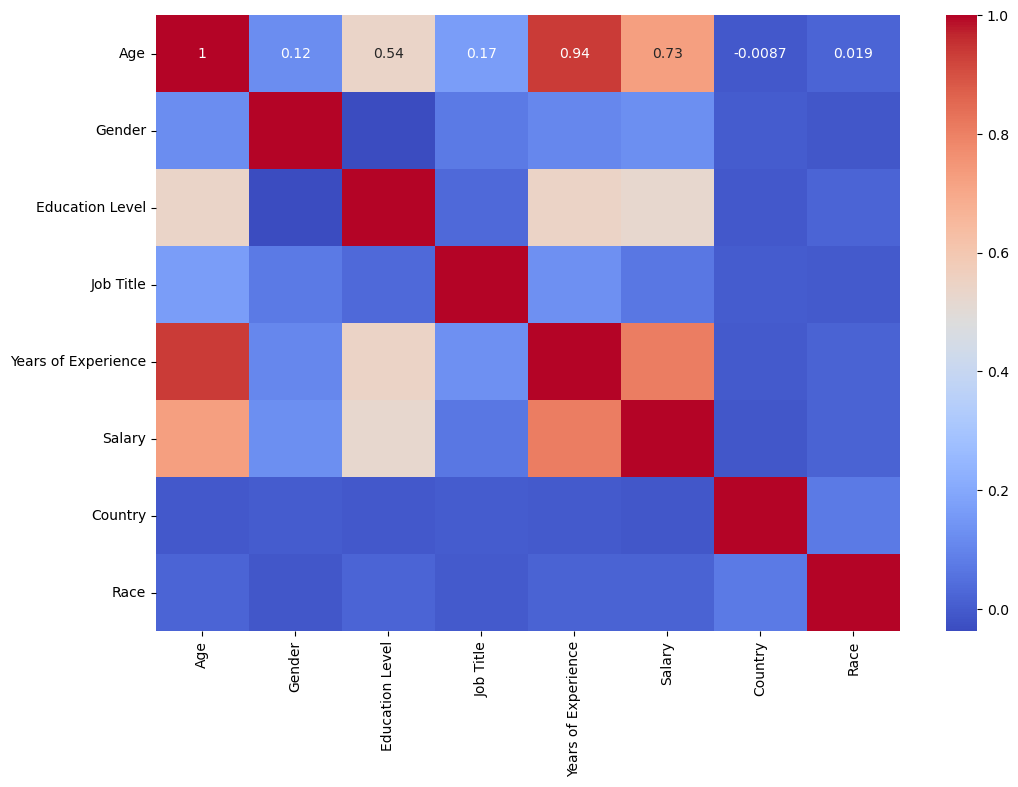

In [89]:
#coorelation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

# Train Test Split

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Salary', axis=1), df['Salary'], test_size=0.2, random_state=42)

# Decision Tree Regressor

In [95]:
from sklearn.tree import DecisionTreeRegressor

#createing the decision tree gressor object
dtree = DecisionTreeRegressor()

In [97]:
from sklearn.model_selection import GridSearchCV

#defining the parameters for the grid search
parameters = {'max_depth' :[2,4,6,8,10],
              'min_samples_split' :[2,4,6,8],
              'min_samples_leaf' :[2,4,6,8],
              'max_features' :['auto','sqrt','log2'],
              'random_state' :[0,42]}
#creating the grid search object
grid_search = GridSearchCV(dtree,parameters,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)

#fit the grid search object to the training data
grid_search.fit(X_train,y_train)

#print the best parameters
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 0}


C:\Users\sonia\anaconda4\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
800 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
590 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sonia\anaconda4\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sonia\anaconda4\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\sonia\anaconda4\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\sonia\anaconda4\Lib\site-packa

In [98]:

dtree = DecisionTreeRegressor(max_depth = 10, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 8, random_state = 42)
dtree

DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=2,
                      min_samples_split=8, random_state=42)

In [107]:

#fitting the training data
dtree.fit(X_train,y_train)

InvalidParameterError: The 'max_features' parameter of DecisionTreeRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

In [103]:
#training accuracy
dtree.score(X_train, y_train)

NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [105]:

#predicting the salary of an employee 
d_pred = dtree.predict(X_test)

NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# Evaluating the Decision Tree Regressor Model

In [110]:
dft = pd.DataFrame({'Actual': y_test, 'Predicted': d_pred})
dft.reset_index(drop=True, inplace=True)
dft.head(10)

NameError: name 'd_pred' is not defined

In [112]:
ax = sns.distplot(dft['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual')
sns.distplot(  dft['Predicted'], color = 'red', ax=ax, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Predicted')

NameError: name 'dft' is not defined

In [114]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 Score: ", r2_score(y_test, d_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, d_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, d_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, d_pred)))

NameError: name 'd_pred' is not defined

# Random Forest Regressor

In [117]:
from sklearn.ensemble import RandomForestRegressor
#creating random forest regressor object
rfg = RandomForestRegressor()

In [119]:
#trainig the model
rfg.fit(X_train, y_train)

RandomForestRegressor()

In [121]:
#training accuracy
rfg.score(X_train, y_train)

0.9945719131227433

In [123]:
#predicitng salary of the employee
r_pred = rfg.predict(X_test)

# Evaluating Random Forest Regressor Model

In [126]:
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': r_pred})
dfr.reset_index(drop=True, inplace=True)
dfr.head(10)

,Actual,Predicted
0,0.656819,0.656819
1,-0.745659,-0.493374
2,-0.290405,-0.286616
3,-1.048183,-1.047994
4,-0.669294,-0.674030
5,1.414598,1.499284
6,-0.820850,-0.820850
7,-1.142906,-1.131350
8,1.509320,1.538833
9,0.277930,0.312302


In [130]:
ax = sns.distplot(dft['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual')
sns.distplot(  dft['Predicted'], color = 'red', ax=ax, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Predicted')

NameError: name 'dft' is not defined

In [132]:
print("R2 Score: ", r2_score(y_test, r_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, r_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, r_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, r_pred)))

R2 Score:  0.9661768693956443
Mean Squared Error:  0.03461353110343734
Mean Absolute Error:  0.07726613207853392
RMSE: 0.1860471206534445


# Conclusion

Coming to the machine learning models, I have used regressor models - Decision Tree Regressor and Random Forest Regressor for predicting the salary. The Random Forest Regressor has performed well with the accuracy of 94.6%